In [2]:
import os
import sys
# import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
def load_points_from_file(filename):
    """Loads 2d points from a csv called filename
    Args:
        filename : Path to .csv file
    Returns:
        (xs, ys) where xs and ys are a numpy array of the co-ordinates.
    """
    points = pd.read_csv(filename, header=None)
    return points[0].values, points[1].values


def view_data_segments(xs, ys):
    """Visualises the input file with each segment plotted in a different colour.
    Args:
        xs : List/array-like of x co-ordinates.
        ys : List/array-like of y co-ordinates.
    Returns:
        None
    """
    assert len(xs) == len(ys)
    assert len(xs) % 20 == 0
    len_data = len(xs)
    num_segments = len_data // 20
    colour = np.concatenate([[i] * 20 for i in range(num_segments)])
    plt.set_cmap('Dark2')
    plt.scatter(xs, ys, c=colour)
    plt.show()
    
#     return colour

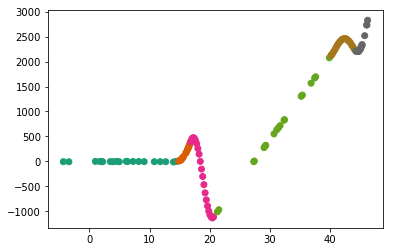

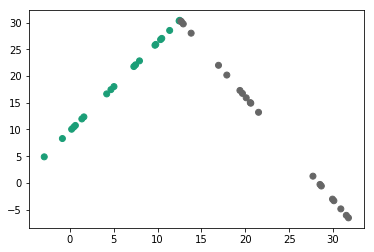

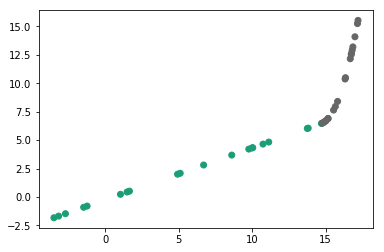

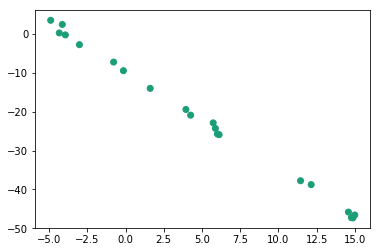

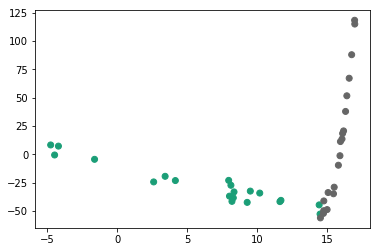

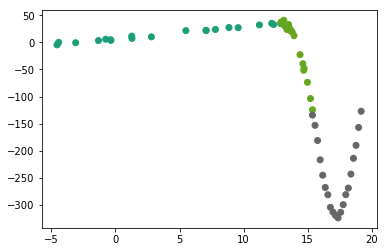

In [42]:
a1_x, a1_y = load_points_from_file('train_data/adv_1.csv')
# view_data_segments(a1_x, a1_y)

a2_x, a2_y = load_points_from_file('train_data/adv_2.csv')
# view_data_segments(a2_x, a2_y)

a3_x, a3_y = load_points_from_file('train_data/adv_3.csv')
view_data_segments(a3_x, a3_y)
# print(view_data_segments(a3_x, a3_y))

b1_x, b1_y = load_points_from_file('train_data/basic_1.csv')
# view_data_segments(b1_x, b1_y)

b2_x, b2_y = load_points_from_file('train_data/basic_2.csv')
view_data_segments(b2_x, b2_y)
# print(view_data_segments(b2_x, b2_y))

b3_x, b3_y = load_points_from_file('train_data/basic_3.csv')
# view_data_segments(b3_x, b3_y)

b4_x, b4_y = load_points_from_file('train_data/basic_4.csv')
view_data_segments(b4_x, b4_y)
# print(view_data_segments(b4_x, b4_y))

b5_x, b5_y = load_points_from_file('train_data/basic_5.csv')
# view_data_segments(b5_x, b5_y)

n1_x, n1_y = load_points_from_file('train_data/noise_1.csv')
view_data_segments(n1_x, n1_y)

n2_x, n2_y = load_points_from_file('train_data/noise_2.csv')
view_data_segments(n2_x, n2_y)

n3_x, n3_y = load_points_from_file('train_data/noise_3.csv')
view_data_segments(n3_x, n3_y)

In [6]:
# Given range(20), return k divided array (for k fold)
def fold_shuffle(k):
    assert k <= 20
    l = np.array(range(20))
    np.random.shuffle(l)
    return np.array_split(l, k)

In [7]:
def output_graph(xs, ys, cof_list, reg_type):
    graph_xs = np.linspace(xs.min(), xs.max(), 100)
    cal_xs = find_x(graph_xs, reg_type)
    graph_ys = 0
    for i, cof in enumerate(cof_list):
        graph_ys += cof*(cal_xs**i)
    fig_g, ax_g = plt.subplots()
    ax_g.scatter(xs, ys, c='b')
    ax_g.plot(graph_xs, graph_ys, c='r')
    plt.show()

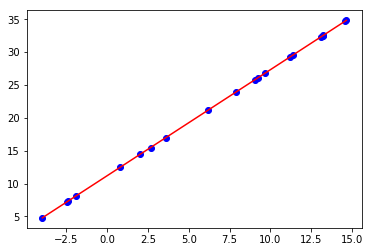

Reconstruction error for basic_1:  2.29558523419e-28
11.1821098878
1.61425717441


In [127]:
# A=np.linalg.inv(X.T.dot*X).dot(X.T).dot(Y)
# y=a+bx
# no need for cross validation for linear
# return a, b, reconstruction error
def linear_regression(xs, ys):
    
    assert len(xs) == len(ys)
    assert len(xs) == 20
        
#     x_v = xs.reshape(np.size(xs), 1)
#     ones = np.ones(xs.shape).reshape(np.size(xs), 1)
#     x = np.column_stack((ones, x_v))
#     y = ys.reshape(np.size(ys), 1)
#     result = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
#     a, b = result[:, 0]
    
    x_v = xs.reshape(np.size(xs), 1)
    ones = np.ones(xs.shape).reshape(np.size(xs), 1)
    x = np.column_stack((ones, x_v))
    y = ys.reshape(np.size(ys), 1)
    result = np.linalg.solve(x.T.dot(x), x.T.dot(y))
    a, b = result[:, 0]

    y_c = a + b*xs
    recon_err = ((ys - y_c) ** 2).sum()

    #average cross_val error
    return a, b, recon_err

a_l, b_l, l_recon_err = linear_regression(b1_x, b1_y)

output_graph(b1_x, b1_y, np.array([a_l, b_l]), 0)
print('Reconstruction error for basic_1: ', l_recon_err)
# list of all cross validation errors
print(a_l)
print(b_l)

In [128]:
# y=a+bx+cx**2+dx**3+...
# return degree, list of coefficient, average_cross_validation_error
def polynomial_regression(xs, ys, max_order):
    
    assert len(xs) == len(ys)
    assert len(xs) == 20
    
    cal_deg = 0
    cal_cof_list = np.zeros(max_order)
#     cal_val_err = sys.maxsize
    cal_recon_err = sys.maxsize
    deg_recon_err_list = np.zeros(max_order)
    #up to polynomials of degree ten
    for degree in range(max_order):
        #return a randomly shuffled array of range(20)
        #5-fold for now
        r_list = fold_shuffle(5)
        #min validation error, its corresponding coefficient list & reconstruction error
        deg_val_err = sys.maxsize
        deg_cof_list = np.zeros(degree+2)
        deg_recon_err = sys.maxsize
        #5-fold, cross-val for each group
        for i in range(5):
            xs_v = np.zeros(4)
            ys_v = np.zeros(4)
            for j in range(4):
                xs_v[j] = xs[r_list[i][j]]
                ys_v[j] = ys[r_list[i][j]]
            xs_t = np.delete(xs, r_list[i])
            ys_t = np.delete(ys, r_list[i])

            #training - return a, b
            deg_count_t = 1
            x = np.ones(xs_t.shape).reshape(np.size(xs_t), 1)
            while deg_count_t <= degree+1:
                x_foo = xs_t.reshape(np.size(xs_t), 1) ** deg_count_t
                x = np.column_stack((x, x_foo))
                deg_count_t += 1
            y = ys_t.reshape(np.size(ys_t), 1)
            result = np.linalg.solve(x.T.dot(x), x.T.dot(y))
            foo_cof_list = result[:,0]

            #validation - to calculate average error
            y_c = np.zeros(xs_v.shape)
            for deg_count_v in range(degree+2):
                y_c += foo_cof_list[deg_count_v]*(xs_v**deg_count_v)
            #the cross_val error for this one repetation
            foo_val_err = ((ys_v - y_c) ** 2).mean()
            
            #check that this validation error is smaller than current smallest
            #if it is, update val_err, cof_list and recon_err  
            if foo_val_err < deg_val_err:
                deg_val_err = foo_val_err
                deg_cof_list = foo_cof_list
                #also update reconstruction error
                ys_recon = np.zeros(ys.shape)
                for deg_count_recon in range (degree+2):
                    ys_recon += foo_cof_list[deg_count_recon]*(xs**deg_count_recon)
                deg_recon_err = ((ys - ys_recon) ** 2).sum()
                
        #check the reconstruction error of this degree is smaller than the current smallest
        #if it is, update deg, val_err, cof_list and recn_err
        #cal_recon_err multipled with a threshold
        if deg_recon_err < cal_recon_err:
            cal_recon_err = deg_recon_err
            cal_deg = degree + 1
            cal_cof_list = deg_cof_list
#             cal_val_err = deg_val_err
        
        #also record each validation error for further use
        deg_recon_err_list[degree] = deg_recon_err
    
    return cal_deg, cal_cof_list, cal_recon_err, deg_recon_err_list

degree, cof_list, recon_err, recon_err_list = polynomial_regression(b1_x, b1_y, 5)
print(degree, cof_list, recon_err, recon_err_list)

1 [ 11.18210989   1.61425717] 1.99581809021e-28 [  1.99581809e-28   3.36054746e-28   4.78365253e-27   1.98627287e-26
   1.42402804e-25]


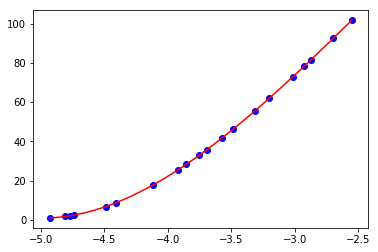

3 [ 214.68210109    4.19695291  -24.06877499   -3.27112046] 1.06775314378e-20
[  7.60076749e+02   1.57938062e+01   1.06775314e-20   2.63445962e-20
   2.58898368e-17]


In [123]:
b3_degree, b3_cof_list, b3_recon_err, b3_recon_err_list = polynomial_regression(b3_x, b3_y, 5)
# view_data_segments(b3_x, b3_y)
output_graph(b3_x, b3_y, b3_cof_list, 0)
print(b3_degree, b3_cof_list, b3_recon_err) 
print(b3_recon_err_list)

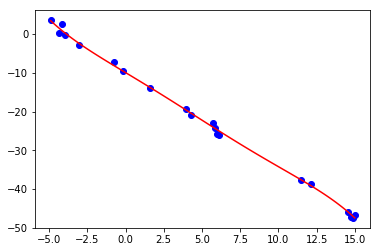

5 [ -9.95806498e+00  -2.36922923e+00  -2.35401944e-03  -7.92742644e-03
   1.28136457e-03  -5.20356116e-05] 10.1142436392
[ 12.39478517  12.16675398  11.00789399  11.01251549  10.11424364]


In [90]:
n1_degree, n1_cof_list, n1_recon_err, n1_recon_err_list = polynomial_regression(n1_x, n1_y, 5)
# view_data_segments(b3_x, b3_y)
output_graph(n1_x, n1_y, n1_cof_list, 0)
print(n1_degree, n1_cof_list, n1_recon_err) 
print(n1_recon_err_list)

In [9]:
typedict = {
    0: 'polynomial',
    1: 'exponential',
    2: 'sine',
    3: 'cosine'
}

In [91]:
#Should return the recon_err, cof_list(a, b), type of unknown
def unknown_regression(xs, ys):
    
    assert len(xs) == len(ys)
    assert len(xs) == 20
    
    #define global variables: recon_err, a, b, type 
    g_recon_err = np.zeros(3)
    g_a = np.zeros(3)
    g_b = np.zeros(3)
    
    #call regression function for each type, update global variables
    #exponential 
    g_recon_err[0], g_a[0], g_b[0] = calculate_unknown(xs, ys, 1)
    #sin function
    g_recon_err[1], g_a[1], g_b[1] = calculate_unknown(xs, ys, 2)
    #cos function
    g_recon_err[2], g_a[2], g_b[2] = calculate_unknown(xs, ys, 3)
#     #log function
#     g_recon_err[1], g_a[1], g_b[1] = calculate_unknown(xs, ys, 2)
    
    reg_type = g_recon_err.argmin()
    #return the smallest recon_err, cof_list, type
    return reg_type+1, g_a[reg_type], g_b[reg_type], g_recon_err[reg_type]

def find_x(xs, reg_type):
    return {
        0: xs,
        1: np.exp(xs),
        2: np.sin(xs),
        3: np.cos(xs)
    }[reg_type]

def calculate_unknown(xs, ys, reg_type):
    x = find_x(xs, reg_type)
    un_a, un_b, un_recon_err = linear_regression(x, ys)
    return un_recon_err, un_a, un_b
    

2 -338.189522346 352.532008582 2.49608212186e-25


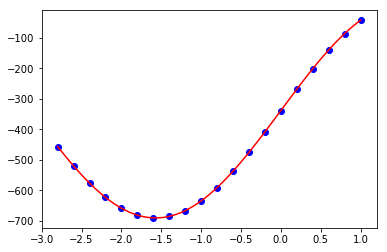

In [92]:
b5_type, b5_a, b5_b, b5_recon_err = unknown_regression(b5_x, b5_y)
print(b5_type, b5_a, b5_b, b5_recon_err)
# view_data_segments(b5_x, b5_y)
output_graph(b5_x, b5_y, np.array([b5_a, b5_b]), b5_type)


In [115]:
def reconstruction_error(xs, ys):
    assert len(xs) == len(ys)
    assert len(xs) % 20 == 0
    len_data = len(xs)
    num_segments = len_data // 20
    xs_list = np.array_split(xs, num_segments)
    ys_list = np.array_split(ys, num_segments)
    total_recon_err = 0
    fig, ax = plt.subplots()
    for i in range(num_segments):
        total_recon_err += segment_reconstruction_error(xs_list[i], ys_list[i], ax)
    plt.show()
    return total_recon_err
        
def segment_reconstruction_error(xs, ys, ax):
    seg_recon_err = 0
    l_a, l_b, l_recon_err = linear_regression(xs, ys)
    p_deg, p_cof_list, p_recon_err, _ = polynomial_regression(xs, ys, 3)
    un_type, un_a, un_b, un_recon_err = unknown_regression(xs, ys)
    thre_l_recon_err = l_recon_err*(0.80)
    #polynomial type
    if p_recon_err < un_recon_err:
        if thre_l_recon_err <= p_recon_err:
            seg_recon_err = l_recon_err
            add_graph(xs, ys, ax, np.array([l_a, l_b]), 0)
            print('linear with threshold')
            print(np.array([l_a, l_b]))
        else:
            seg_recon_err = p_recon_err
            add_graph(xs, ys, ax, p_cof_list, 0)
            print('polynomial with degree: ', p_deg)
            print(p_cof_list)
    #unknown type
    elif un_recon_err <= p_recon_err:
        if thre_l_recon_err <= un_recon_err:
            seg_recon_err = l_recon_err
            add_graph(xs, ys, ax, np.array([l_a, l_b]), 0)
            print('linear with threshold')
            print(np.array([l_a, l_b]))
        else:
            seg_recon_err = un_recon_err
            add_graph(xs, ys, ax, np.array([un_a, un_b]), un_type)
            print('unknown type: ', un_type)
            print(np.array([un_a, un_b]))
    
    return seg_recon_err
    
def add_graph(xs, ys, ax, cof_list, reg_type):
    graph_xs = np.linspace(xs.min(), xs.max(), 100)
    cal_xs = find_x(graph_xs, reg_type)
    graph_ys = 0
    for i, cof in enumerate(cof_list):
        graph_ys += cof*(cal_xs**i)
    ax.scatter(xs, ys, c='b')
    ax.plot(graph_xs, graph_ys, c='r')

linear with threshold
[ 9.71367432  1.65467376]
polynomial with degree:  1
[ 54.66153956  -1.92745202]


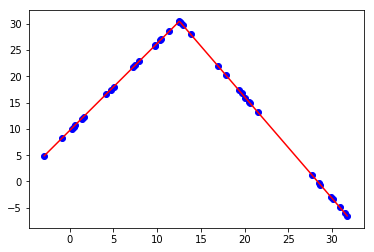

3.10968968838e-27


In [105]:
b2_recon_err = reconstruction_error(b2_x, b2_y)
print(b2_recon_err)

linear with threshold
[-4.1389539  -0.04161129]
polynomial with degree:  4
[  2.69563185e+05  -6.66684528e+04   6.21659608e+03  -2.59743842e+02
   4.11614093e+00]
unknown type:  2
[-327.77706609 -802.66079885]
linear with threshold
[-4535.11413967   165.78125282]
unknown type:  2
[ 2251.00188449  -209.48948465]
polynomial with degree:  3
[ -5.25992243e+04   1.26263385e+04  -4.84532387e+02   5.13406500e+00]


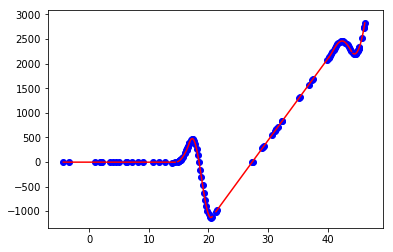

1014.44761628


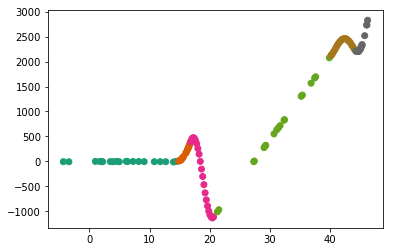

In [106]:
a3_recon_err = reconstruction_error(a3_x, a3_y)
print(a3_recon_err)
view_data_segments(a3_x, a3_y)

unknown type:  2
[-8.04942136  6.71113167]
linear with threshold
[-11.22580921   2.39614476]
unknown type:  2
[ 34.35031307   3.3748509 ]


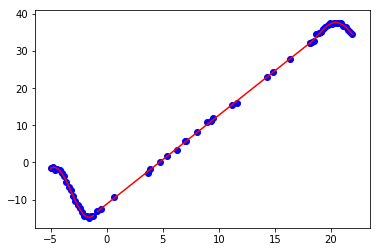

3.68513205045


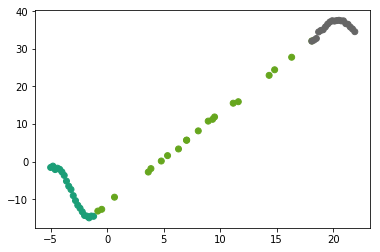

In [84]:
a2_recon_err = reconstruction_error(a2_x, a2_y)
print(a2_recon_err)
view_data_segments(a2_x, a2_y)

linear with threshold
[-9.6124737  -2.49987996]


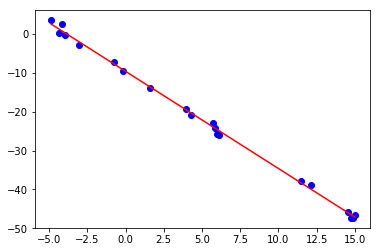

12.2074601401


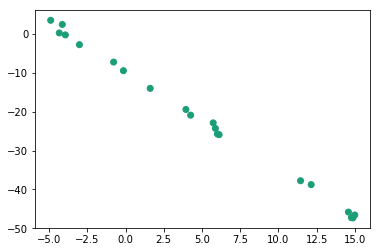

In [107]:
n1_recon_err = reconstruction_error(n1_x, n1_y)
print(n1_recon_err)
view_data_segments(n1_x, n1_y)

linear with threshold
[-9.71623401 -2.81116327]
polynomial with degree:  2
[ 6121.08900898  -846.63154661    29.033677  ]


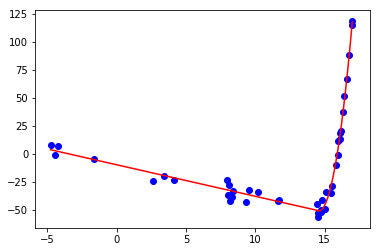

852.435673521


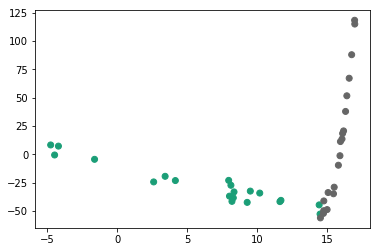

In [116]:
n2_recon_err = reconstruction_error(n2_x, n2_y)
print(n2_recon_err)
view_data_segments(n2_x, n2_y)

linear with threshold
[ 6.55148211  2.23047477]
polynomial with degree:  2
[-4582.78514094   712.8655017    -27.50777733]
unknown type:  2
[-176.23295309  144.32937208]


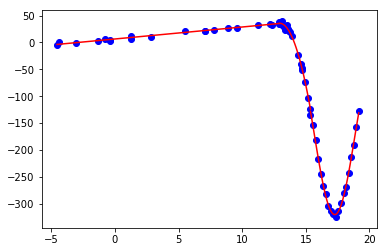

483.288560104


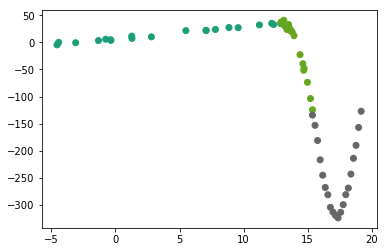

In [117]:
n3_recon_err = reconstruction_error(n3_x, n3_y)
print(n3_recon_err)
view_data_segments(n3_x, n3_y)